<a href="https://colab.research.google.com/github/danamdz/retoAnalitica/blob/main/Locations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as sps

cobicho = pd.read_csv("covid19_tweets.csv")
cobicho.head(30)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
7,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,NaN,TweetDeck,False
8,Prathamesh Bendre,NaN,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25,29,18,False,2020-07-25 12:26:59,Praying for good health and recovery of @Chouh...,"['covid19', 'covidPositive']",Twitter for Android,False
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201,34239,29802,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False


In [ ]:
cobicho = cobicho.drop(['is_retweet', 'user_description','user_location'], axis=1)
cobicho

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
0,ᏉᎥ☻լꂅϮ,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone
1,Tom Basile 🇺🇸,2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android
2,Time4fisticuffs,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android
3,ethel mertz,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone
4,DIPR-J&K,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android
...,...,...,...,...,...,...,...,...,...,...
74431,Laura Wolfrom,2010-09-24 02:01:15,85,586,1902,False,2020-08-04 03:13:29,So far this summer I have filled up my lawn mo...,"['COVID19', 'QuarantineLife']",Twitter for iPhone
74432,Professor Tonya M. Evans,2013-05-14 20:15:24,4289,1066,53569,False,2020-08-04 03:13:26,"ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@B...","['TechIntersect', 'Bitcoin', 'COVID19']",Twitter Web App
74433,People's Daily app,2018-02-04 12:36:42,1413,102,16,False,2020-08-04 03:13:22,Community workers in Tianshan District of Urum...,"['China', 'Xinjiang']",Twitter Web App
74434,M0ser,2014-02-18 03:46:28,2554,1733,129104,False,2020-08-04 03:13:19,If only we had a responsible media to warn us ...,['COVID19'],Twitter for iPhone


In [ ]:
cobicho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74436 entries, 0 to 74435
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_name        74436 non-null  object
 1   user_created     74436 non-null  object
 2   user_followers   74436 non-null  int64 
 3   user_friends     74436 non-null  int64 
 4   user_favourites  74436 non-null  int64 
 5   user_verified    74436 non-null  bool  
 6   date             74436 non-null  object
 7   text             74436 non-null  object
 8   hashtags         53002 non-null  object
 9   source           74424 non-null  object
dtypes: bool(1), int64(3), object(6)
memory usage: 5.2+ MB


In [ ]:
cobicho.tail(30)

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
74406,Tuoi Tre News,2011-03-08 10:14:44,28397,1094,3,False,2020-08-04 03:14:28,"Death of 7th #COVID19 patient, having suffered...","['COVID19', 'Vietnam']",Twitter Web App
74407,UFB,2016-08-20 06:04:39,5257,5816,106441,False,2020-08-04 03:14:26,Interesting isn't it that less than 2 weeks af...,['Covid19'],Twitter Web App
74408,Kantanu (KK),2009-11-05 19:08:55,278,782,1584,False,2020-08-04 03:14:24,"Where there is a will, there is a way #Covid19...","['Covid19', 'VentilatorBed']",Twitter for iPad
74409,Lilianne Labbe-Babin,2013-09-14 18:47:50,32,105,4255,False,2020-08-04 03:14:22,We need @senatemajldr and the Senate to pass t...,"['HEROESact', 'COVID19']",Twitter Web App
74410,Stephen Sheehan,2009-06-27 03:27:36,487,1016,31604,False,2020-08-04 03:14:13,If there were actual legislation to help us du...,['Covid19'],Twitter Web App
74411,LiteraryLass38,2011-10-14 19:18:54,804,370,179239,False,2020-08-04 03:14:13,A CNN survey found that 63% of Floridians beli...,['Covid19'],Twitter Web App
74412,USAID Indonesia,2010-10-05 14:46:59,11187,523,3838,True,2020-08-04 03:14:10,“I hope the community understands the importan...,['Surakarta'],Twitter Web App
74413,Himalayan Mail,2015-09-20 14:23:02,2328,204,169,False,2020-08-04 03:14:10,Former Karnataka CM and Leader of Opposition S...,['COVID19'],Twitter for iPhone
74414,Matthew Stark,2015-10-28 23:17:26,24,82,1179,False,2020-08-04 03:14:09,Wife me up. #food #COVID19 #Dodgers https://t....,"['food', 'COVID19', 'Dodgers']",Twitter for iPhone
74415,CPI (M),2014-02-13 10:07:47,336277,78,3570,True,2020-08-04 03:14:09,India's #COVID19 curve continues to rise unaba...,['COVID19'],Twitter Web App


In [ ]:
cobi_verified = cobicho[(cobicho['user_verified']==True)&(cobicho['user_followers']>10000)]
cobi_verified

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
21,APO Group English,2011-02-22 09:09:45,10661,6,2037,True,2020-07-25 12:26:31,Coronavirus - South Africa: COVID-19 update fo...,NaN,Africa Newsroom
25,Blood Donors India,2008-12-23 07:55:39,1215920,2047,19359,True,2020-07-25 12:26:26,#Kolar\nNeed #Blood Type : B-positive\nAt : J...,"['Kolar', 'Blood', 'COVID19']",Blood Donors India
39,ASHP,2009-09-15 19:52:43,32008,3763,7862,True,2020-07-25 12:26:00,We released two new #COVID19 podcast episodes ...,['COVID19'],Twitter Web App
43,TOI Delhi,2009-04-13 13:00:35,52186,41,74,True,2020-07-25 12:25:49,"#Delhi reports 1,142 #COVID19 positive cases a...","['Delhi', 'COVID19']",TweetDeck
60,#IndiaFightsCorona,2020-03-31 07:41:35,100214,70,1748,True,2020-07-25 12:25:25,#IndiaFightsCorona :\n\n📍 Do you agree that a ...,['IndiaFightsCorona'],Twitter Web App
...,...,...,...,...,...,...,...,...,...,...
74388,Deccan Herald,2011-03-18 10:02:16,57696,738,1084,True,2020-08-04 03:14:55,While Victoria Hospital has seen 123 #Covid19 ...,['Covid19'],Twitter Web App
74390,NewsMobile,2013-12-26 08:20:23,15417,89,3514,True,2020-08-04 03:14:50,The total number of #COVID19 samples tested up...,['COVID19'],TweetDeck
74412,USAID Indonesia,2010-10-05 14:46:59,11187,523,3838,True,2020-08-04 03:14:10,“I hope the community understands the importan...,['Surakarta'],Twitter Web App
74415,CPI (M),2014-02-13 10:07:47,336277,78,3570,True,2020-08-04 03:14:09,India's #COVID19 curve continues to rise unaba...,['COVID19'],Twitter Web App


In [ ]:
cobi_verified.describe()

,user_followers,user_friends,user_favourites
count,7.586000e+03,7586.000000,7586.000000
mean,9.931436e+05,2803.625626,8518.538887
std,2.394671e+06,17551.145671,29129.593080
min,1.001200e+04,0.000000,0.000000
25%,2.865500e+04,128.000000,267.000000
50%,8.815100e+04,531.500000,1565.000000
75%,5.539080e+05,1781.000000,5708.500000
max,1.389284e+07,497363.000000,570018.000000


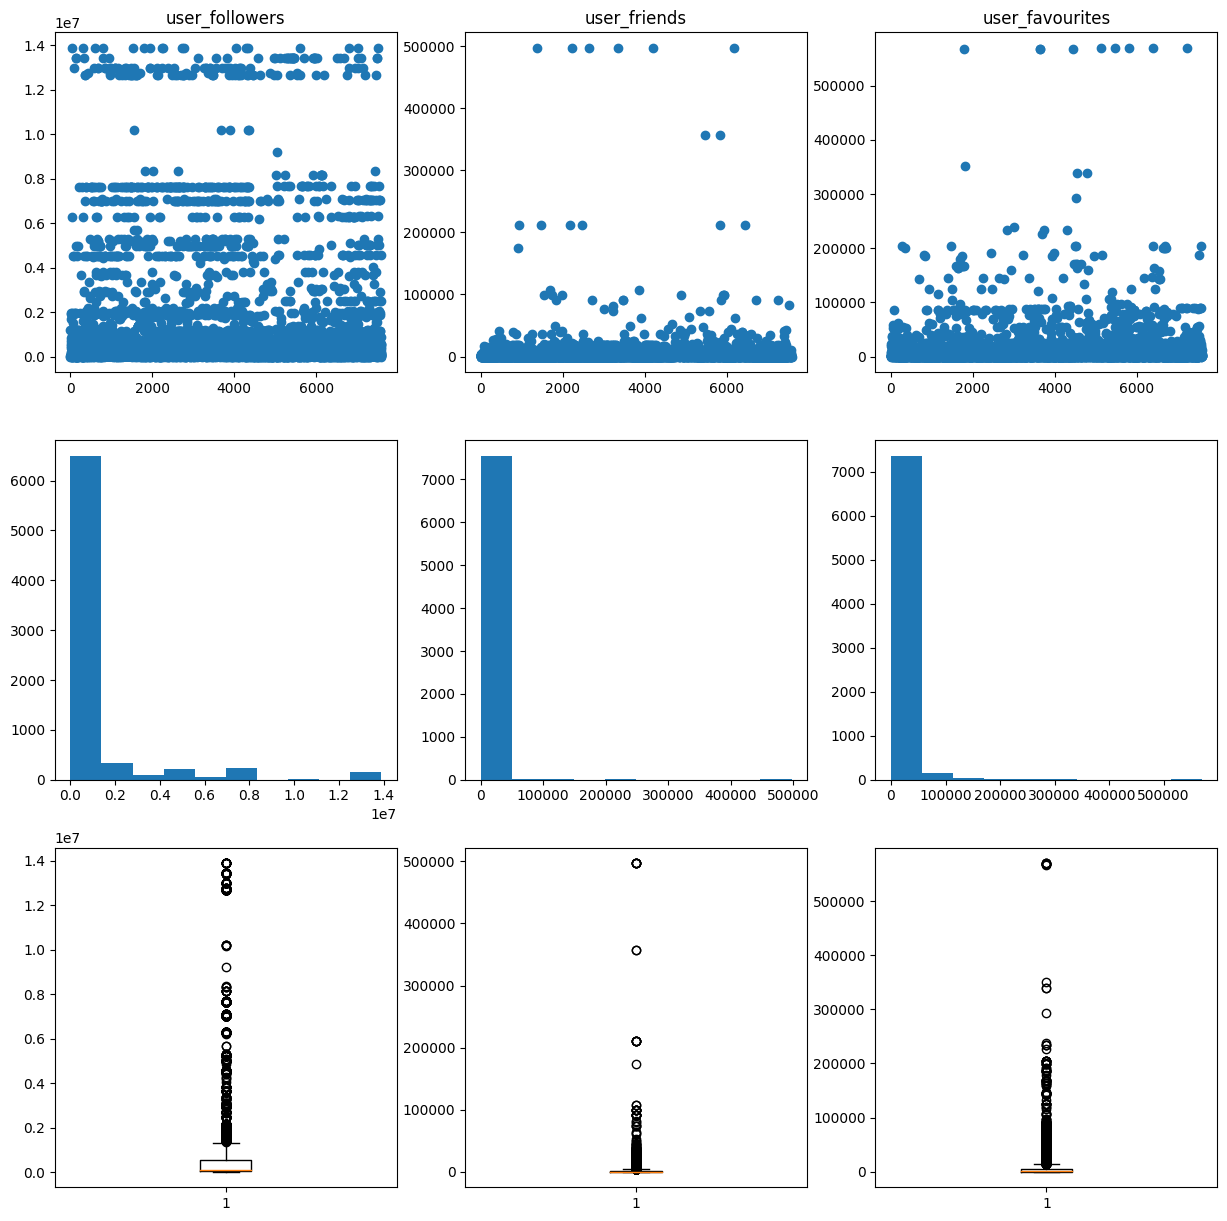

In [ ]:
def make_descriptive_graphs(df,columns):
  nr = df.shape[0]
  nc = len(columns)
  order = np.arange(nr)
  fig, ax = plt.subplots(3,nc,figsize=(15, 15), gridspec_kw={'height_ratios': [3, 3, 3]})
  for i, c in enumerate(columns):
    ax[0,i].set_title(c)
    ax[0,i].scatter(order,df[c])
    ax[1,i].hist(df[c])
    ax[2,i].boxplot(df[c])




make_descriptive_graphs(cobi_verified[['user_followers','user_friends','user_favourites']], cobi_verified[['user_followers','user_friends','user_favourites']].columns)

Outliers for columns user_followers are:
[77, 120, 208, 235, 348, 449, 547, 715, 775, 785, 786, 926, 1119, 1161, 1354, 1376, 1398, 1494, 1775, 2020, 2308, 2504, 2710, 2837, 2851, 2897, 2997, 3032, 3051, 3079, 3130, 3184, 3196, 3203, 3232, 3251, 3270, 3285, 3364, 3429, 3486, 3555, 3583, 3602, 3660, 3705, 3739, 3805, 3866, 3872, 3955, 3995, 4047, 4164, 4192, 4330, 4332, 4349, 4367, 4516, 4619, 4742, 4773, 4776, 4837, 4839, 4847, 4858, 4891, 4942, 4969, 5005, 5018, 5032, 5085, 5144, 5163, 5187, 5250, 5312, 5327, 5344, 5436, 5478, 5480, 5592, 5645, 5657, 5713, 5737, 5814, 5844, 5875, 5935, 5956, 5971, 6002, 6010, 6030, 6039, 6061, 6096, 6117, 6126, 6170, 6224, 6374, 6381, 6385, 6404, 6406, 6427, 6536, 6553, 6559, 6598, 6663, 6702, 6760, 6827, 6834, 6851, 6909, 6942, 6958, 6959, 7024, 7053, 7054, 7204, 7419, 7432, 7433, 7435, 7453, 7525, 7529, 7552, 7572, 7594, 7596, 7755, 8162, 8282, 8287, 8379, 8410, 8416, 8492, 8493, 8495, 8502, 8532, 8591, 8692, 8780, 8791, 8800, 8809, 8812, 8824, 8897,

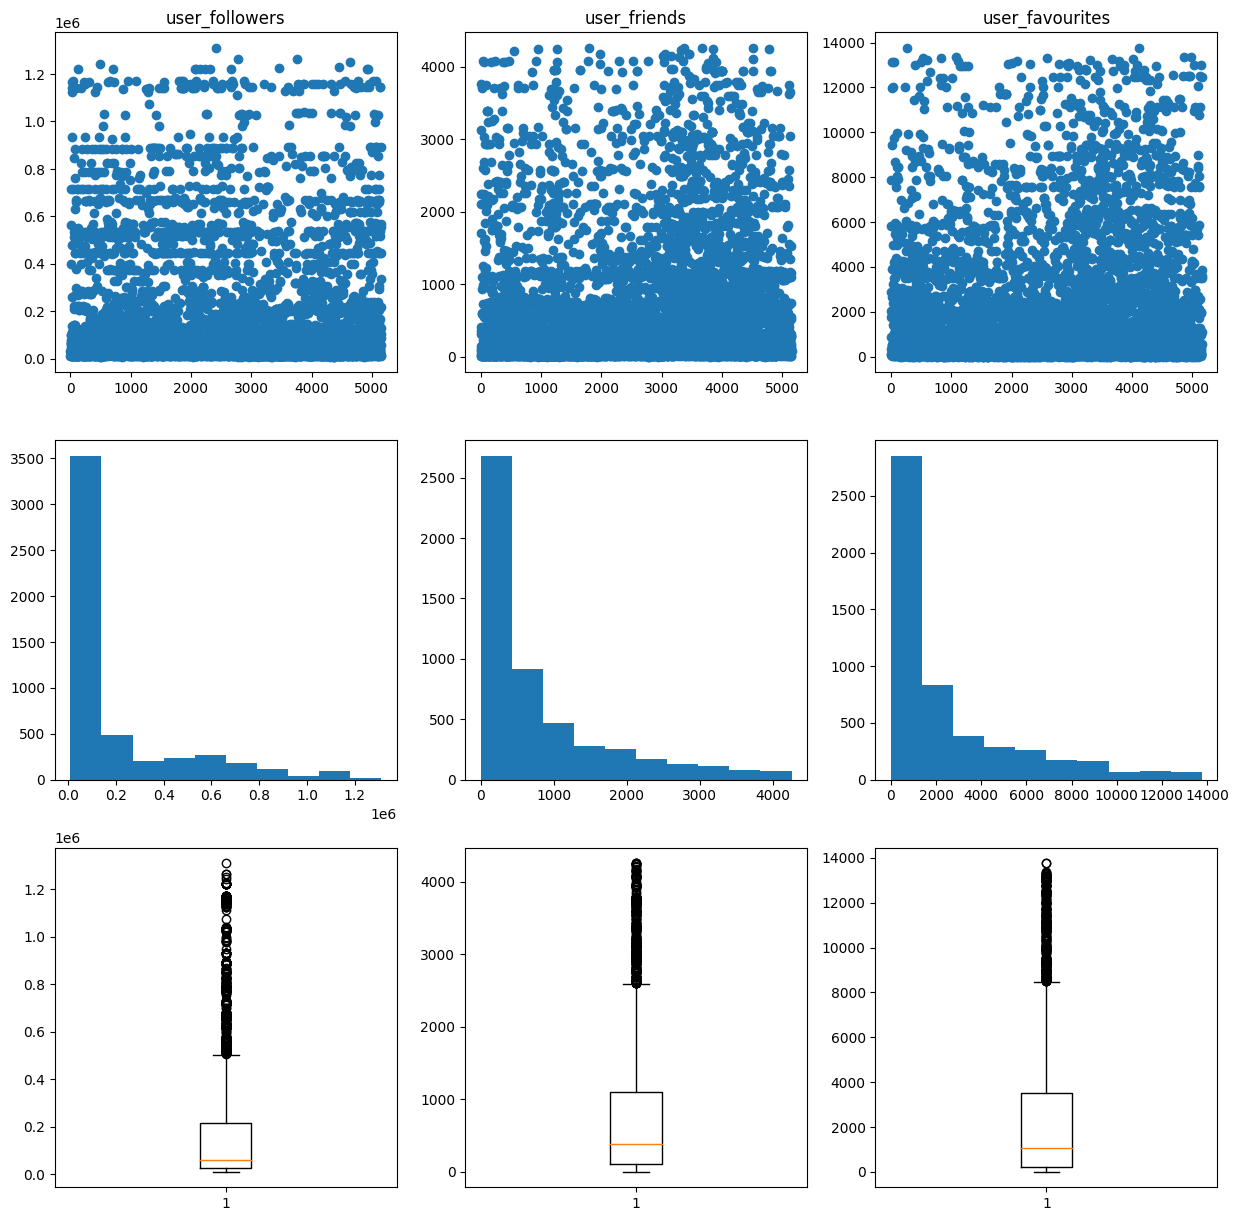

In [ ]:
def remove_outliers(df, columns, show = False):
  all_outliers=[]
  for c in df.columns:
    Q1 = df[c].describe()['25%']
    Q3 = df[c].describe()['75%']
    IQR = Q3 - Q1
    outliers_df= df[(df[c] > Q3 + 1.5*IQR) |
                    (df[c] < Q1 - 1.5*IQR) ]

    outliers_list = list(outliers_df.index)

    if show:
      print(f'Outliers for columns {c} are:')
      print(outliers_list)
      print('---\n'*2)
    all_outliers = all_outliers + outliers_list
  if show:
    print(all_outliers)
    print('The outliers without repetition are:')
  outliers = list(set(all_outliers))
  print(outliers)
  df_without_outliers = df.drop(outliers)
  return df_without_outliers


cobichosinoutliers = remove_outliers(cobi_verified[['user_followers','user_friends','user_favourites']], cobi_verified[['user_followers','user_friends','user_favourites']].columns, show = True)

make_descriptive_graphs(cobichosinoutliers,cobichosinoutliers.columns)

In [ ]:
print("Possible values for location are: \n", cobicho.loc[cobichosinoutliers.index].user_location.value_counts())
x = cobicho.loc[cobichosinoutliers.index]

Possible values for location are: 
 India                          331
Mumbai, India                  192
Text RESIST to 50409           177
New Delhi, India               164
Washington, DC                 127
                              ... 
Jefferson City, MO               1
Oklahoma and Washington, DC      1
Washington, D.C.                 1
Springfield, Mo.                 1
South Asia                       1
Name: user_location, Length: 793, dtype: int64


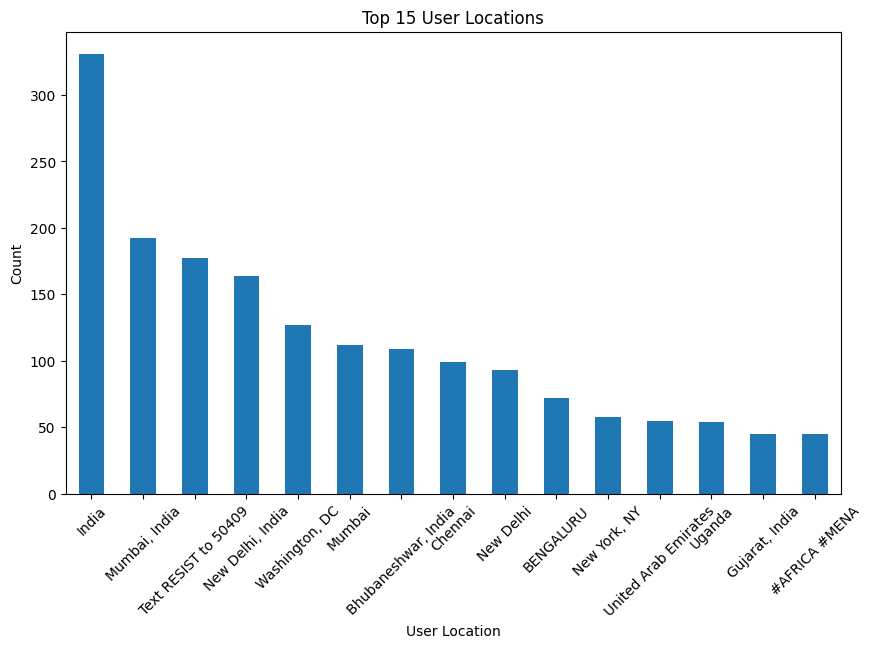

In [ ]:
value_counts = cobicho.loc[cobichosinoutliers.index].user_location.value_counts()

# Seleccionar los primeros 15 valores más comunes
top_15_locations = value_counts.head(15)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
top_15_locations.plot(kind='bar')
plt.title('Top 15 User Locations')
plt.xlabel('User Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
x[x.user_location == 'India'].user_name.value_counts()

Deccan Herald                             72
NewsMobile                                50
ORF                                       25
Covid India Seva                          20
Mirror Now                                15
WION                                      14
The Logical Indian                        14
ET NOW                                    13
The Weather Channel India                 11
Forbes India                              10
UNICEF India                               8
NewsX                                      6
99acres.com                                6
Oneindia News                              5
Business Today                             5
Live Law                                   5
Firstpost Sports                           5
CNBC-TV18                                  4
Banega Swasth India                        4
Ketto                                      4
Doordarshan Sports                         4
Kumar Manish #VoicesAgainstCovidStigma     3
India.com 